<br>
<center><font size = 15> Ridge , Lasso  , ElasticNet </font></center>
<br>

<img  height = 2000px src = "./img/ridge_lasso_ela.png">

<br>
<br>


<div style = "width : 400px; paddig-right:10px; float : right;">
    <font size = 8>
        190510 이성령
    </font></div>

# Library Load

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd , re
np.random.seed(19510)

## Functions

In [40]:
def random_uniform(size) :
    _  = np.random.uniform(low = -1 , high = 1 , size = [size])[:,np.newaxis]
    return _

def noise(size) :
    _  = np.random.normal(loc = 0 , scale = 1 , size = [size])[:,np.newaxis]
    return _

def generate_x(size) :
    total = random_uniform(size)
    for _ in np.arange(19) :
        column = random_uniform(size)
        total = np.concatenate( (total , column) , axis = 1)
    return total

def plotting(data , title , lambda_list , ax ) :
    for idx , i in enumerate(data.columns.tolist()) :
        ax.plot(np.array(lambda_list) , data.loc[:,i].values , label = str(idx))
    ax.legend(frameon=False, loc='upper center', ncol=10)
    ax.set_title(title, color ="black", fontsize = 20)
    
def Loop_func(lambda_list , f , train_x , train_y , test_x , test_y ) :
    train_mse  , test_mse = [] , []
    coef = pd.DataFrame()
    for i in lambda_list :
        func = f(alpha=i)
        func.fit(train_x , train_y )
        string = str(func)
        if re.split(r"[(]", string)[0] == "Ridge" :
            func_coef = pd.DataFrame(func.coef_)
        else :
            func_coef = pd.DataFrame(func.coef_).T
        coef = pd.concat([ coef , func_coef ], axis = 0)
        func_train_mse = mean_squared_error(train_y , func.predict(train_x) )
        func_test_mse = mean_squared_error(test_y , func.predict(test_x) )
        train_mse.append(func_train_mse)
        test_mse.append(func_test_mse)
    coef.reset_index(drop= True , inplace= True)
    return train_mse  , test_mse , coef

def loss_plot(x , y , label , ax ) :
    ax.plot(x,y, label = label)
    ax.legend(fontsize = 15)
    label2 = re.split(" " , label)
    ax.set_title( label2[0] , fontsize = 30)
    arg_min = np.argmin(y)
    ax.text(x[arg_min] , y[arg_min], r"{} mse : {:.3f} , lambda : {:.5f}".format(label2[1] , y[arg_min] , x[arg_min]) , fontsize = 15)

## Data Generate

In [41]:
train_n = 100
train_x = generate_x(train_n)
test_n = 10000
test_x = generate_x(test_n)

# Case1

## $\beta_1 = \beta_2 = 1 , $
## $\beta_3 = \beta_4 = ... = \beta_{20} = 0$

In [42]:
beta = np.array([1] * 2 + [0] * 18)[ :, np.newaxis ]
train_eps = noise(train_n)
test_eps = noise(test_n)
train_y = train_x.dot(beta) + train_eps
test_y  = test_x.dot(beta) + test_eps
##
Ridge_lambda_list = np.linspace(1e-5 , 50.0 , 100)
Lasso_lambda_list = np.linspace(1e-5 , 0.35 , 100)
Elas_lambda_list = np.linspace(1e-5 , 0.8 , 100)

ridge_train_mse  , ridge_test_mse , ridge_coef = Loop_func(Ridge_lambda_list , Ridge, train_x , train_y, test_x , test_y)
lasso_train_mse  , lasso_test_mse , lasso_coef = Loop_func(Lasso_lambda_list , Lasso, train_x , train_y, test_x , test_y)
elastic_train_mse  , elastic_test_mse , elastic_coef = Loop_func(Elas_lambda_list , ElasticNet, train_x , train_y , test_x , test_y)

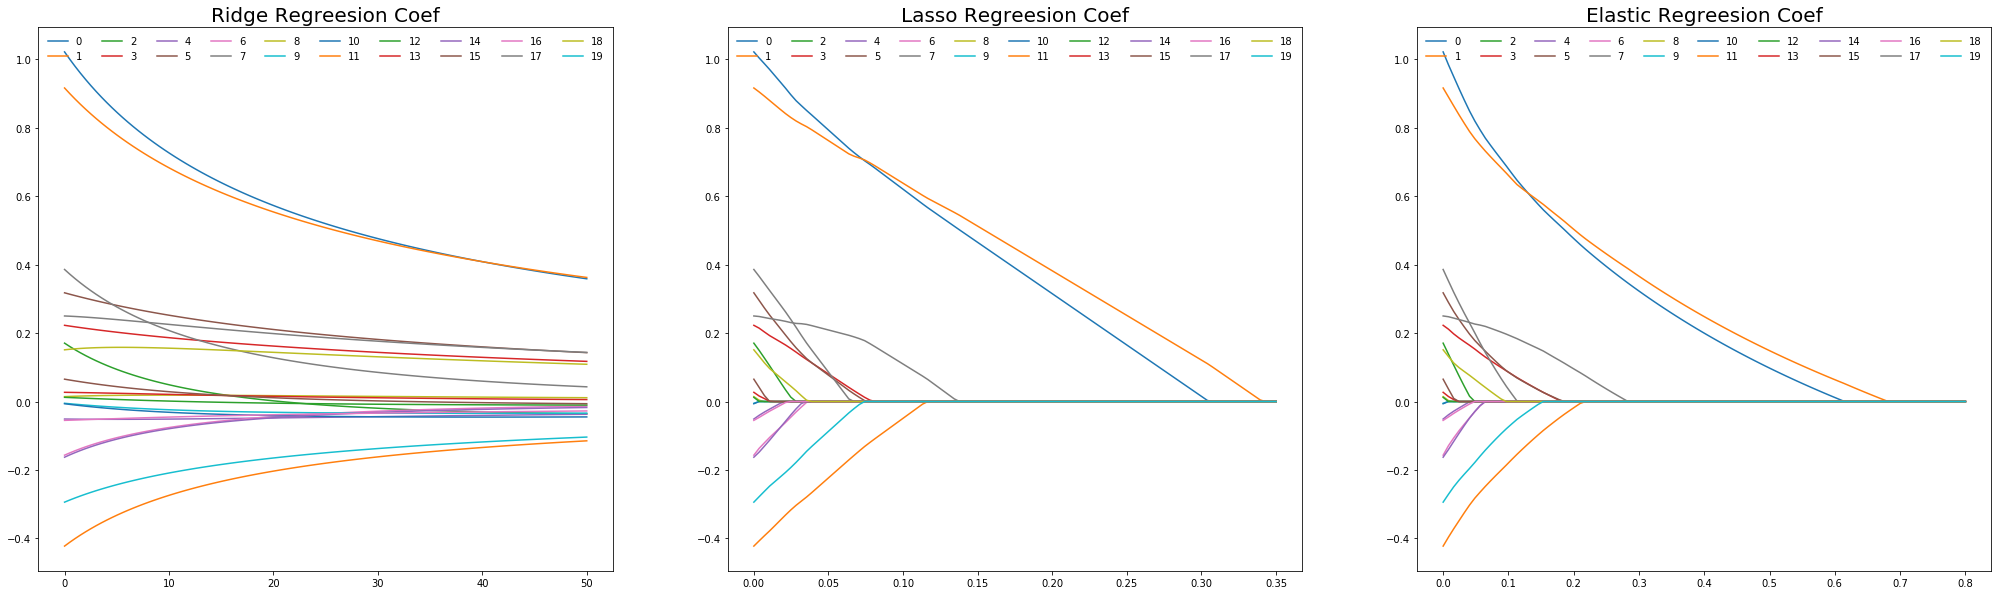

In [43]:
f, ax = plt.subplots( 1,  3, figsize=(35, 10))
plotting(ridge_coef , "Ridge Regreesion Coef" , Ridge_lambda_list , ax.flatten()[0])
plotting(lasso_coef , "Lasso Regreesion Coef"  , Lasso_lambda_list, ax.flatten()[1])
plotting(elastic_coef , "Elastic Regreesion Coef" , Elas_lambda_list, ax.flatten()[2])

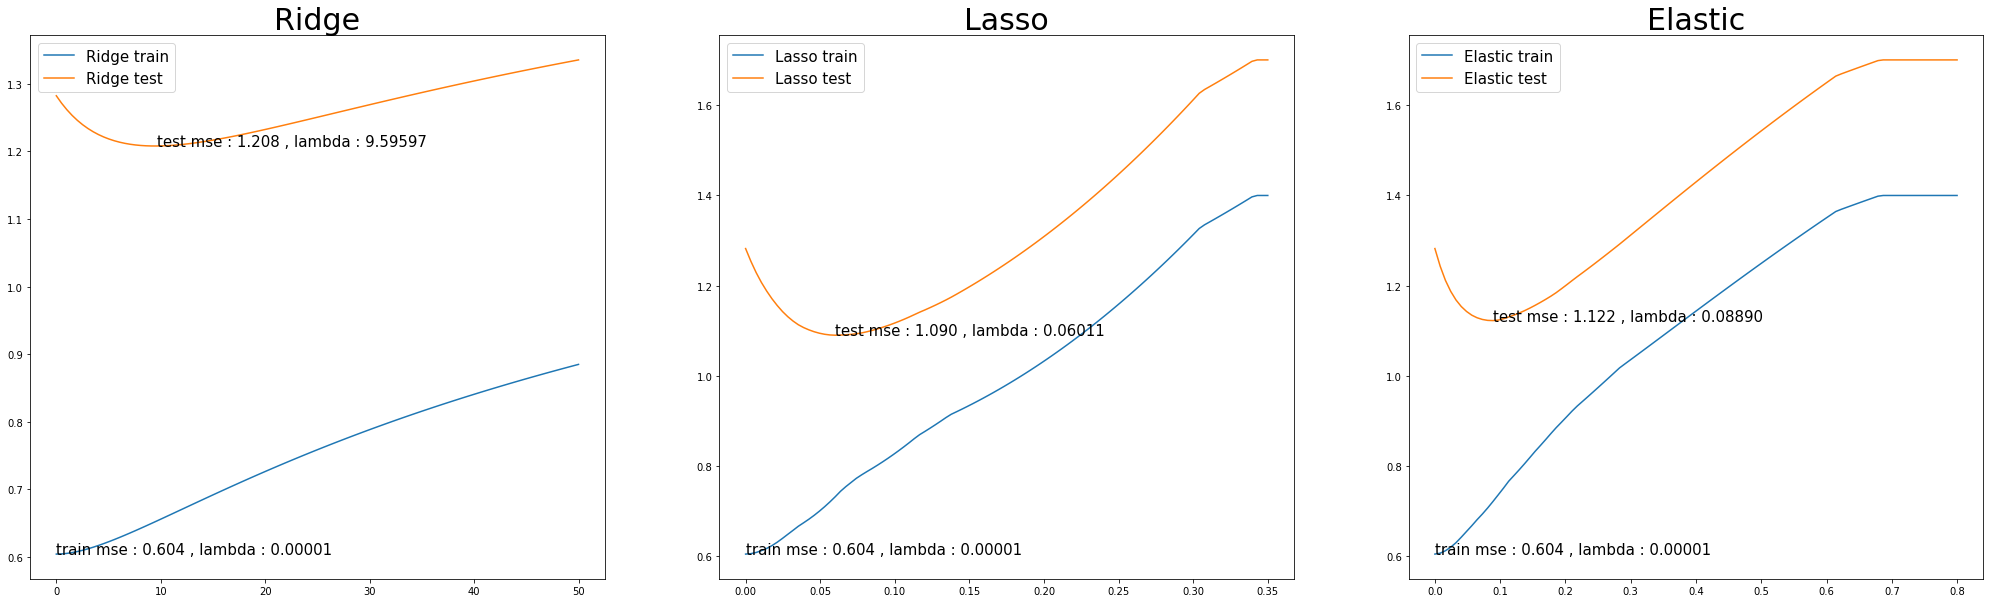

In [44]:
f, ax = plt.subplots( 1,  3, figsize=(35, 10))
loss_plot(Ridge_lambda_list , ridge_train_mse , label ="Ridge train", ax = ax.flatten()[0]) 
loss_plot(Ridge_lambda_list , ridge_test_mse , label ="Ridge test" , ax = ax.flatten()[0]) 
loss_plot(Lasso_lambda_list , lasso_train_mse , label ="Lasso train" , ax = ax.flatten()[1]) ;
loss_plot(Lasso_lambda_list , lasso_test_mse , label ="Lasso test" , ax = ax.flatten()[1]) ;
loss_plot(Elas_lambda_list , elastic_train_mse , label ="Elastic train" , ax = ax.flatten()[2]) ;
loss_plot(Elas_lambda_list , elastic_test_mse , label ="Elastic test" , ax = ax.flatten()[2]) ;
plt.show()

# Case2

## $\beta_1 = \beta_2 = \beta_3 = \beta_4 = ... = \beta_{20} = 1 $

In [45]:
beta = np.array([1] * 20)[ :, np.newaxis ]
train_y = train_x.dot(beta) + train_eps
test_y = test_x.dot(beta) + test_eps

Ridge_lambda_list = np.linspace(1e-4 , 50.0 , 100)
Lasso_lambda_list = np.linspace(1e-4 , 0.6 , 100)
Elas_lambda_list = np.linspace(1e-4 , 1.0 , 100)

ridge_train_mse  , ridge_test_mse , ridge_coef = Loop_func(Ridge_lambda_list , Ridge, train_x , train_y, test_x , test_y)
lasso_train_mse  , lasso_test_mse , lasso_coef = Loop_func(Lasso_lambda_list , Lasso, train_x , train_y, test_x , test_y)
elastic_train_mse  , elastic_test_mse , elastic_coef = Loop_func(Elas_lambda_list , ElasticNet, train_x , train_y , test_x , test_y)

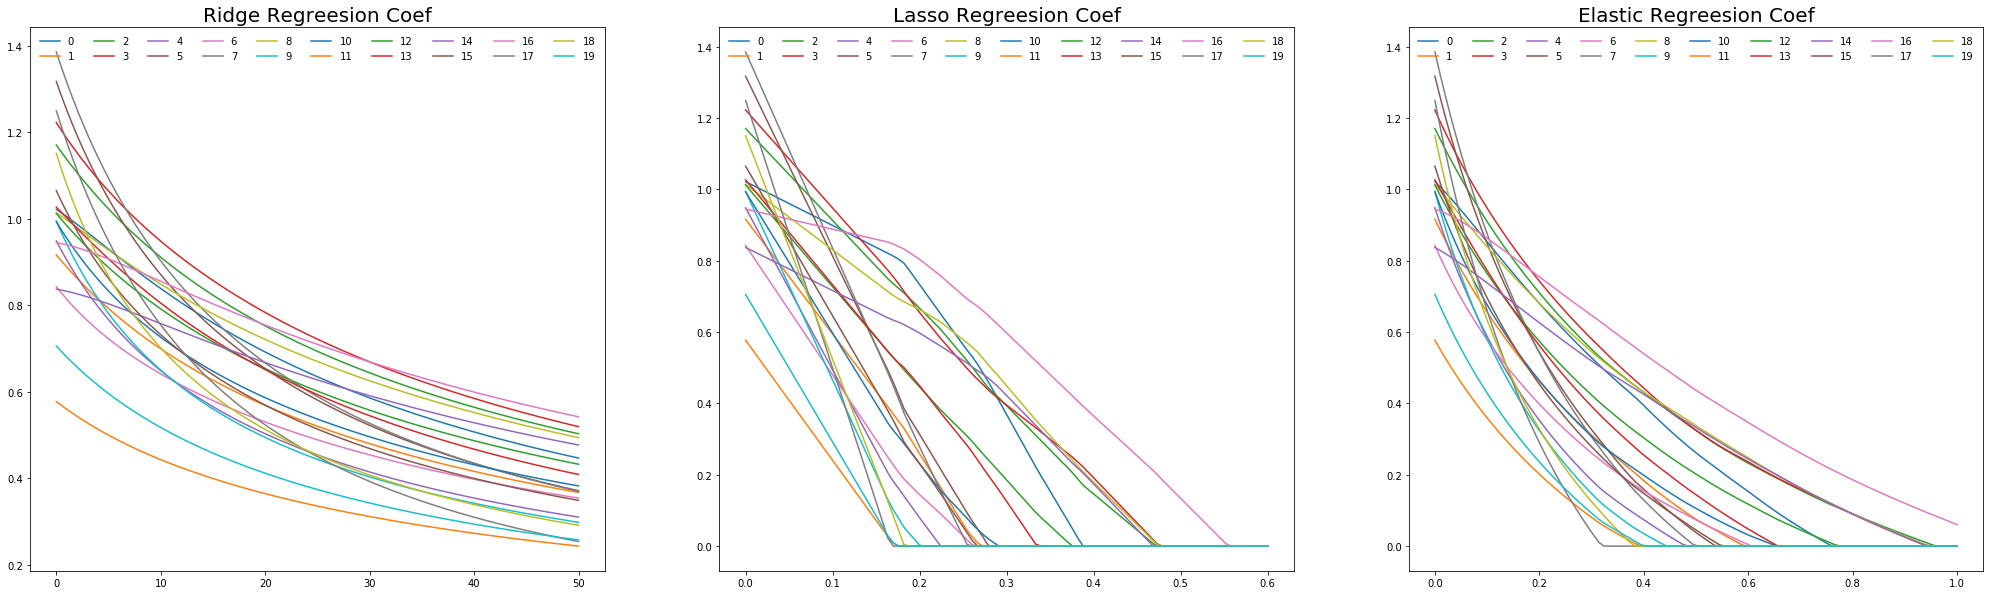

In [46]:
f, ax = plt.subplots( 1,  3, figsize=(35, 10))
plotting(ridge_coef , "Ridge Regreesion Coef" , Ridge_lambda_list , ax.flatten()[0])
plotting(lasso_coef , "Lasso Regreesion Coef"  , Lasso_lambda_list, ax.flatten()[1])
plotting(elastic_coef , "Elastic Regreesion Coef" , Elas_lambda_list, ax.flatten()[2])

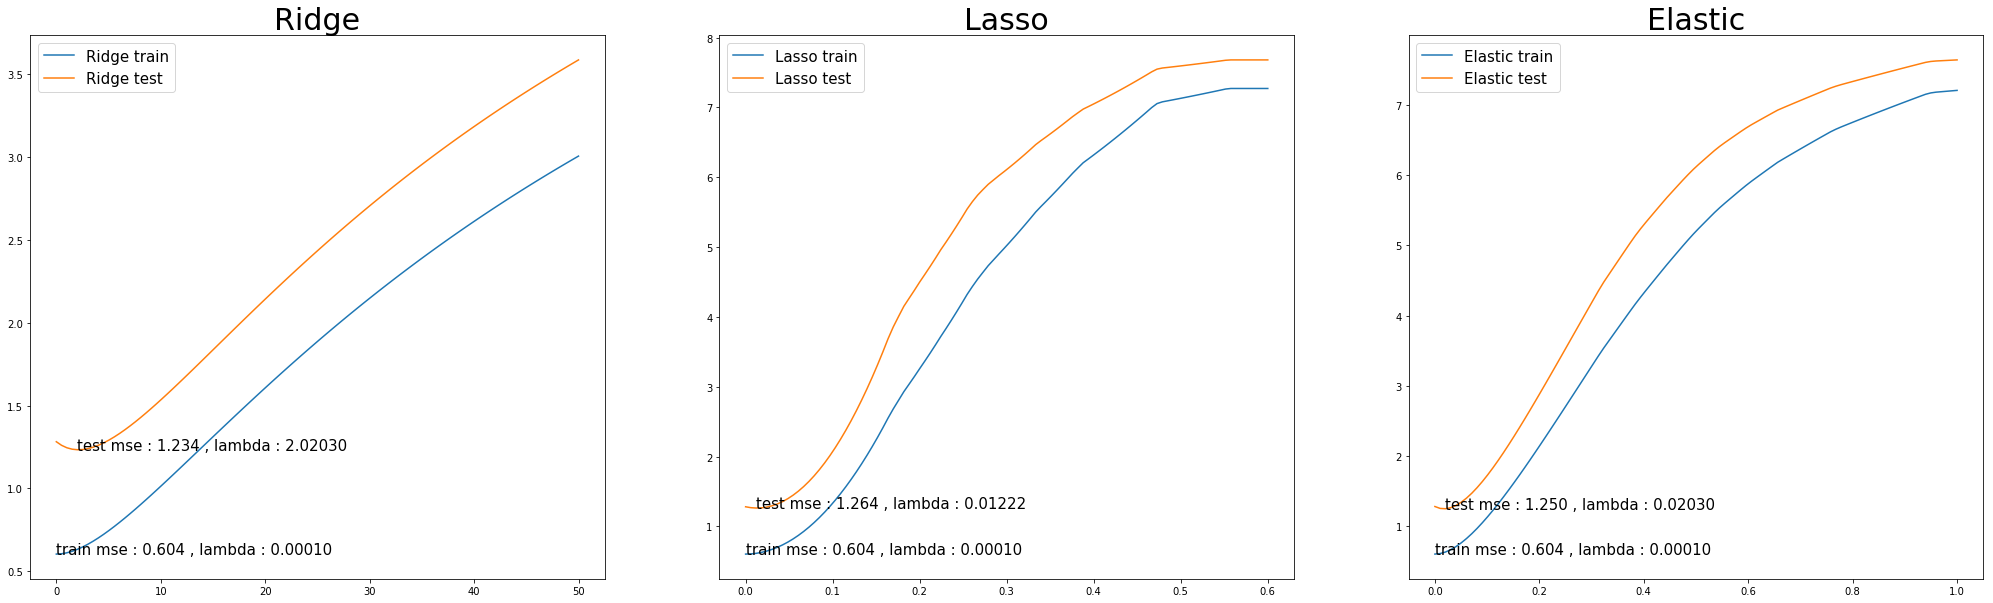

In [47]:
f, ax = plt.subplots( 1,  3, figsize=(35, 10))
loss_plot(Ridge_lambda_list , ridge_train_mse , label ="Ridge train", ax = ax.flatten()[0]) 
loss_plot(Ridge_lambda_list , ridge_test_mse , label ="Ridge test" , ax = ax.flatten()[0]) 
loss_plot(Lasso_lambda_list , lasso_train_mse , label ="Lasso train" , ax = ax.flatten()[1]) ;
loss_plot(Lasso_lambda_list , lasso_test_mse , label ="Lasso test" , ax = ax.flatten()[1]) ;
loss_plot(Elas_lambda_list , elastic_train_mse , label ="Elastic train" , ax = ax.flatten()[2]) ;
loss_plot(Elas_lambda_list , elastic_test_mse , label ="Elastic test" , ax = ax.flatten()[2]) ;
plt.show()

# Simple Special Case for Ridge Regression and the Lasso

$Suppose  \ X = diag(1_p)=
\begin{bmatrix}
1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & 1
\end{bmatrix}
$
<br>
$y_j = \beta_j + \epsilon_j \ \ for \  j \ =  \ 1,2,...,p$

## 1. Usual Least Squares Problem

$\sum_{j=1}^{p}(y_j - \beta_j)^2 $

$Q(\beta) = (y-\beta)^2$

${\partial\over\partial \beta}Q(\beta) = -2(y-\beta) \quad min(\hat\beta) = y$

## 2. Ridge Regression Problem

$\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}\beta_j^{2}$

$Q(\beta) = (1+\lambda)\beta^2 -2\beta y + y^2 = (1+\lambda)(\beta - \frac{y}{1+\lambda})^2+\frac{\lambda}{1+\lambda}y^2$

${\partial\over\partial \beta}Q(\beta) = -2(y-\beta)+2\lambda\beta = 2(-y+\beta(1+\lambda))  $

$min(\hat\beta) = \frac{y}{1+\lambda}$

## 3. Lasso Problem

<font size = 5> $\sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}|\beta_j|$ </font >

<font size = 4; color = "green"  > $if\;\; \beta > 0\,\,, $ </font >

$\;\; \sum_{j=1}^{p}(y_j - \beta_j)^2 + \lambda \sum_{j=1}^{p}\beta_j$

$\;\; \sum (\beta^2-(y-\frac{\lambda}{2}))^2 + y^2-(y-\frac{\lambda}{2})^2) $

$\;\; (\beta - y + \frac{\lambda}{2})^2 + \lambda y - \frac{\lambda^2}{4}$

$\;\; min\hat\beta =  y-\frac{\lambda}{2} (\beta>0)  \qquad  y-\frac{\lambda}{2} > 0 $ 



<font size = 4; color = "green"  > $if\;\; \beta < 0\,\,, $  </font >

$\;\; \sum_{j=1}^{p}(y_j - \beta_j)^2 - \lambda \sum_{j=1}^{p}\beta_j$

$\;\; \sum (\beta^2-(y+\frac{\lambda}{2}))^2 + y^2-(y+\frac{\lambda}{2})^2) $

$\;\; (\beta - y - \frac{\lambda}{2})^2 - \lambda y - \frac{\lambda^2}{4}$

$\;\; min\hat\beta =  y + \frac{\lambda}{2} (\beta>0)  \qquad  y+ \frac{\lambda}{2} < 0 $ 


> <font size = 5; color = "red"  > Soft-Thresholding </font >

* wavelet shrinkage이라고 불린다고 하고 합니다.
* image-denoising에서 이 경우를 적용하면, 강조하고 싶은 부분을 강조해주는 효과가 있다고 합니다.

$\hat\beta_j^L=
\begin{cases}
y_j-\frac{\lambda}{2} , & \mbox{if } y_j > \frac{\lambda}{2} \\
y_j+\frac{\lambda}{2}, & \mbox{if }y_j < - \frac{\lambda}{2} \\
0 , & \mbox{if } |y_j| \le \frac{\lambda}{2} \\
\end{cases}
= \begin{cases}
\hat\beta_j-\frac{\lambda}{2} , & \mbox{if } \hat\beta_j > \frac{\lambda}{2} \\
\hat\beta_j+\frac{\lambda}{2}, & \mbox{if }\hat\beta_j< -\frac{\lambda}{2} \\
0 , & \mbox{if } |\hat\beta_j| \le \frac{\lambda}{2} \\
\end{cases}
$

